In [1]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

In [2]:
def f(x):
    return x ** 2

def f_grad(x):
    return 2 * x

In [3]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


In [4]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.5, f_grad)

epoch 10, x: 0.000000


In [11]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


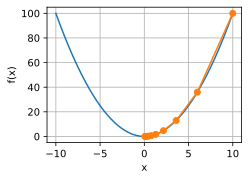

In [14]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [f(x) for x in results]],
            'x', 'f(x)', fmts=['-', '-o'])
show_trace(results, f)

epoch 10, x: 3.486784


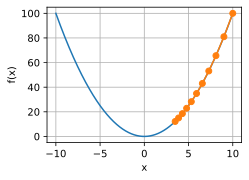

In [15]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 1.073742


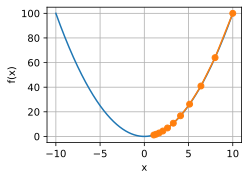

In [16]:
show_trace(gd(0.1, f_grad), f)

epoch 10, x: 61.917364


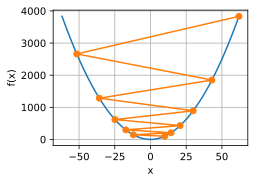

In [17]:
show_trace(gd(1.1, f_grad), f)

epoch 10, x: -1.528166


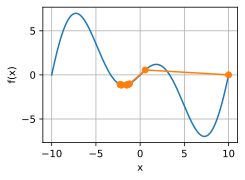

In [18]:
c = torch.tensor(0.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)

def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c*x)

show_trace(gd(2, f_grad), f)

epoch 10, x: 7.478597


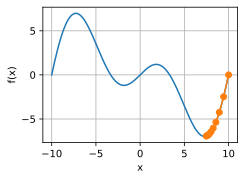

In [20]:
show_trace(gd(0.12, f_grad), f)

In [28]:
def train_2d(trainer, steps=20, f_grad=None):
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i+1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                           torch.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


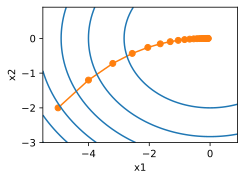

In [29]:
def f_2d(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):
    return(2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)
    
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

epoch 1, x: 8.000181198120117
epoch 2, x: 6.001522541046143
epoch 3, x: 4.0113983154296875
epoch 4, x: 2.0825424194335938
epoch 5, x: 0.5257632732391357
epoch 6, x: 0.011785626411437988
epoch 7, x: 1.3690441846847534e-07
epoch 8, x: 0.0
epoch 9, x: 0.0
epoch 10, x: 0.0


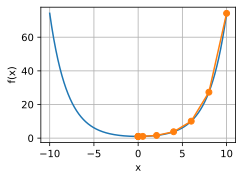

In [36]:
c = torch.tensor(0.5)

def f(x):
    return torch.cosh(c * x)

def f_grad(x):
    return c * torch.sinh(c * x)

def f_hess(x):
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
        print(f'epoch {i +1}, x: {x}')
    return results

show_trace(newton(), f)

epoch 1, x: 5.0
epoch 2, x: 24.994869232177734
epoch 3, x: 27.783124923706055
epoch 4, x: 26.80009651184082
epoch 5, x: 26.834177017211914
epoch 6, x: 26.834131240844727
epoch 7, x: 26.83413314819336
epoch 8, x: 26.83413314819336
epoch 9, x: 26.83413314819336
epoch 10, x: 26.83413314819336


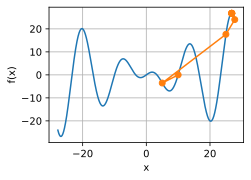

In [41]:
c = torch.tensor(0.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)

def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):
    return -2 * c * torch.sin(c * x) - x * c ** 2 * torch.cos(c * x)

show_trace(newton(), f)

epoch 1, x: 5.0
epoch 2, x: 24.994869232177734
epoch 3, x: 22.206613540649414
epoch 4, x: 19.633129119873047
epoch 5, x: 20.256601333618164
epoch 6, x: 20.2219295501709
epoch 7, x: 20.22187614440918
epoch 8, x: 20.221874237060547
epoch 9, x: 20.221874237060547
epoch 10, x: 20.221874237060547


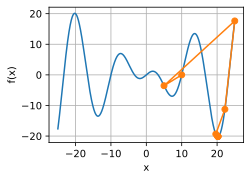

In [42]:
c = torch.tensor(0.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)

def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):
    return abs(-2 * c * torch.sin(c * x) - x * c ** 2 * torch.cos(c * x))

show_trace(newton(), f)

epoch 1, x: 7.5
epoch 2, x: 7.387165069580078
epoch 3, x: 7.329002380371094
epoch 4, x: 7.299392223358154
epoch 5, x: 7.2844414710998535
epoch 6, x: 7.276927947998047
epoch 7, x: 7.2731614112854
epoch 8, x: 7.271275520324707
epoch 9, x: 7.270331859588623
epoch 10, x: 7.269859790802002


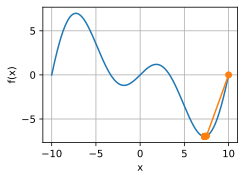

In [43]:
c = torch.tensor(0.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)

def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):
    return -2 * c * torch.sin(c * x) - x * c ** 2 * torch.cos(c * x)

show_trace(newton(0.5), f)